<a href="https://colab.research.google.com/github/partrita/JupyterNote/blob/master/R_bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 내용 출처

포루쉬 프라빈 신하의 저서 R을 활용한바이오인포매틱스(에이콘출판, 2014)의 내용을 발췌해 Jupyter notebook 파일로 만들었다.

# 1. R을 이용한 생명정보학 시작

## 1.1. 라이브러리 설치

라이브러리 설치 명령어
```
install.packages("package_name")

```

라이브러리 불러오기
```
library(package_name)
```

## 1.2. 데이터 읽고 쓰기

주로 테이블 데이터를 읽기 위해 `read.csv`나 `read.table`를 사용한다.

In [0]:
iris <- read.csv('iris.csv', header= TRUE, sep=",")
head(iris) # 맨위 6행의 데이터를 학인

sepal.length,sepal.width,petal.length,petal.width,variety
5.1,3.5,1.4,0.2,Setosa
4.9,3.0,1.4,0.2,Setosa
4.7,3.2,1.3,0.2,Setosa
4.6,3.1,1.5,0.2,Setosa
5.0,3.6,1.4,0.2,Setosa
5.4,3.9,1.7,0.4,Setosa


## 1.3. 데이터 프레임 나누기

`iris` 데이터로 부터 일부 데이터를 뽑아 내기 위해 `data.frame` 함수에 열 이름을 지정해 준다.

In [0]:
iris2 <- data.frame(sepal.length=iris$sepal.length, sepal.width=iris$sepal.width, variety=iris$variety)
head(iris2)

sepal.length,sepal.width,variety
5.1,3.5,Setosa
4.9,3.0,Setosa
4.7,3.2,Setosa
4.6,3.1,Setosa
5.0,3.6,Setosa
5.4,3.9,Setosa


다음과 같이 일정한 조건을 만족시키는 부분만 추출할 수도 있다.

In [0]:
iris3 <- subset(iris, sepal.length >= 5)
head(iris3)

,sepal.length,sepal.width,petal.length,petal.width,variety
1,5.1,3.5,1.4,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa
6,5.4,3.9,1.7,0.4,Setosa
8,5.0,3.4,1.5,0.2,Setosa
11,5.4,3.7,1.5,0.2,Setosa
15,5.8,4.0,1.2,0.2,Setosa


## 1.4. 기술 통계처리

In [0]:
summary(iris) # 각 열에 대한 요약

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

## 1.5. 확률 분포 데이터 만들기

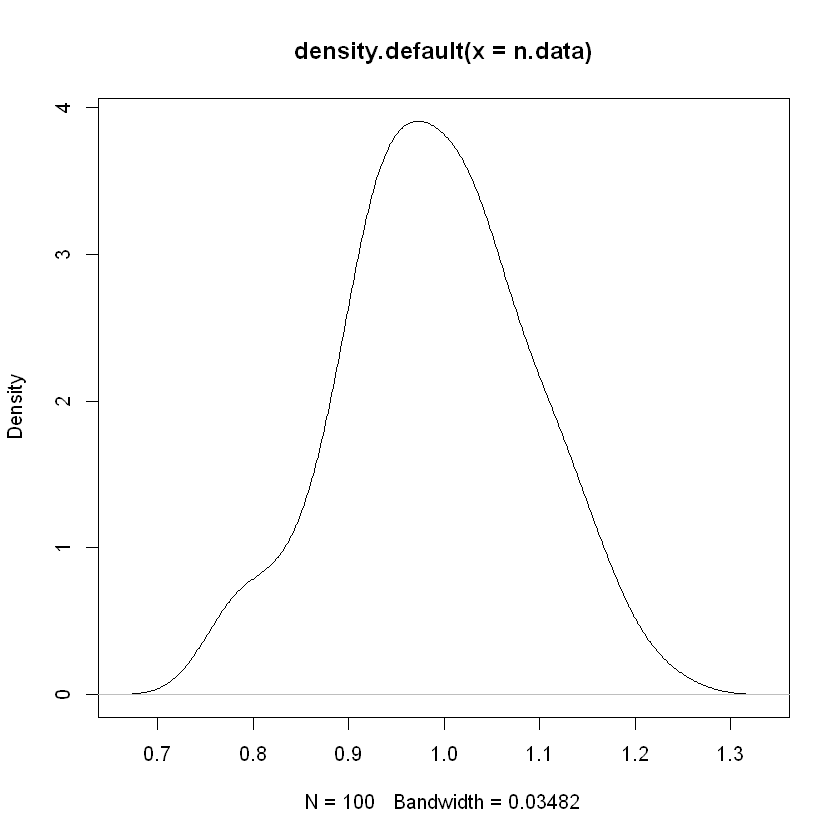

In [0]:
n.data <- rnorm(n=100, mean=1, sd=0.1)
# hist(n.data)
plot(density(n.data))

## 1.6. 데이터 통계 검정

R에 내장된 t-test를 해본다. t-test는 관측 데이터의 평균이 실제의 평균과 통계적 차이가 있는지를 판단한다.

사용한 sleep 데이터는 10명의 환자(ID)들이 두 종류(group)의 약을 먹었을때 수면시간(extra)의 증감을 비교한 것이다.

In [0]:
data(sleep) # 기본적으로 들어있는 데이터 사용
sleep

extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9
2.0,1,10


In [0]:
test <- t.test(sleep[,1]~sleep[,2])
test


	Welch Two Sample t-test

data:  sleep[, 1] by sleep[, 2]
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


t-test의 결과로 `p-value = 0.07939` 를 구했다.

## 1.7. 데이터 시각화

데이터의 직관적인 이해를 위해 시각화를 해본다. `iris` 데이터셋을 사용해 산포도를 그려본다.

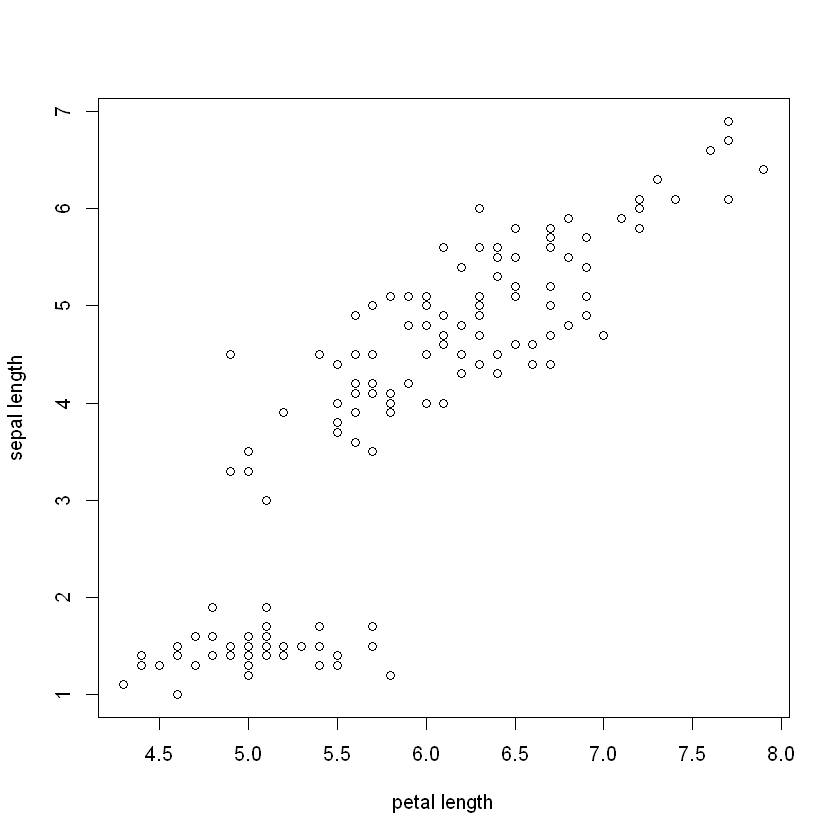

In [0]:
plot(x=iris[,1],y=iris[,3], xlab='petal length', ylab='sepal length')

박스 플롯을 그리기 위해 `boxplot()`함수를 사용한다.

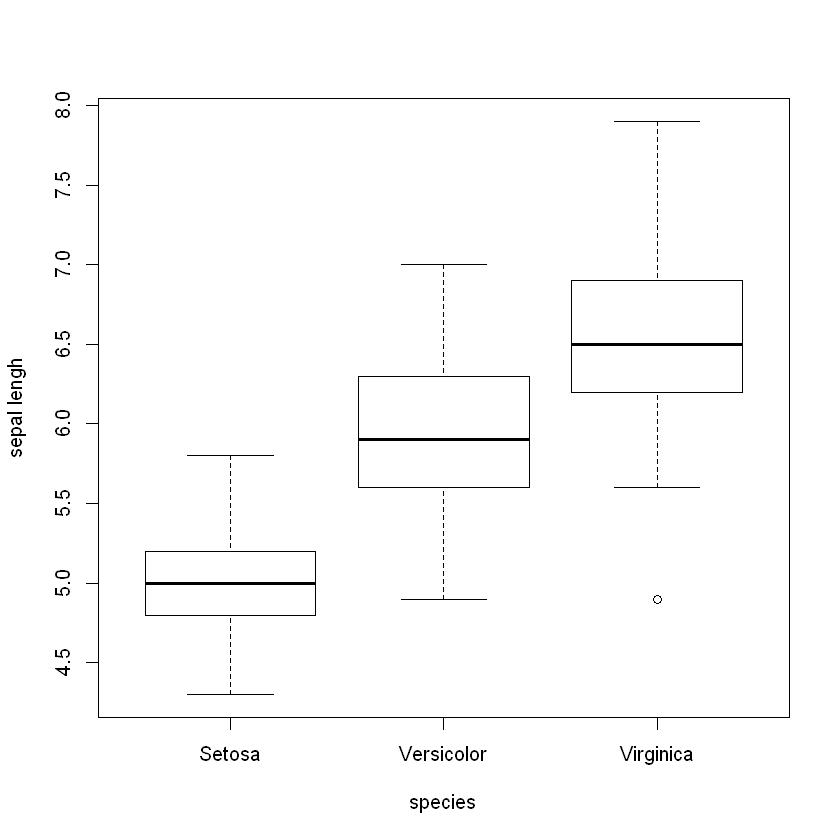

In [0]:
boxplot(sepal.length~variety, data=iris, xlab='species', ylab='sepal lengh')

## 1.8. R에서 PubMed 작업

PubMed는 문헌 검색을 제공하는 서비스이다. PubMed에 접속하지 않고 R에서 검색어의 메타 데이터를 분석하는 방법을 알아본다.

In [0]:
# install.packages("RISmed") # 패키지 설치
library(RISmed)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

package 'RISmed' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\건회\AppData\Local\Temp\RtmpQxEF3Y\downloaded_packages


In [0]:
cancer <- EUtilsSummary("cancer[ti]", type="esearch", db="pubmed")
class(cancer)

[1] "EUtilsSummary"
attr(,"package")
[1] "RISmed"

In [0]:
str(cancer)

Formal class 'EUtilsSummary' [package "RISmed"] with 6 slots
  ..@ db              : chr "pubmed"
  ..@ count           : num 895477
  ..@ retmax          : num 1000
  ..@ retstart        : num 0
  ..@ PMID            : chr [1:1000] "31121622" "31121595" "31121588" "31121583" ...
  ..@ querytranslation: chr "cancer[ti]"


In [0]:
cancer@PMID[1:10]

[1] "31121622" "31121595" "31121588" "31121583" "31121562" "31121557"
 [7] "31121525" "31121496" "31121491" "31121484"

## 1.9. BioMart로부터 데이터 검색

Ensembl, Uniprot, HGNC, Gramene, Wormbase등의 데이터베이스를 한번에 검색할 수 있는 BioMart 데이터베이스를 다루는 방법을 살펴본다.

In [0]:
source("http://bioconductor.org/biocLite.R") # Bioconductor 라이브러리를 추가

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help


In [0]:
# biocLite("biomaRt")
library(biomaRt)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'biomaRt'


package 'biomaRt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\건회\AppData\Local\Temp\RtmpQxEF3Y\downloaded_packages


Old packages: 'assertthat', 'backports', 'BH', 'boot', 'broom', 'callr',
  'caret', 'checkpoint', 'class', 'cli', 'clipr', 'cluster', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'dplyr', 'evaluate', 'fansi', 'forcats', 'foreign', 'formatR',
  'geometry', 'ggplot2', 'glmnet', 'glue', 'gower', 'gtable', 'haven',
  'hexbin', 'highr', 'htmlwidgets', 'httpuv', 'httr', 'ipred', 'IRdisplay',
  'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later', 'lattice', 'lava',
  'lazyeval', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime',
  'ModelMetrics', 'modelr', 'nlme', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'quantmod', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes',
  'repr', 'reprex', 'rlang', 'rmarkdown', 'robustbase', 'rpart', 'rstudioapi',
  'RUnit', 'rvest', 'scales', 'sfsmisc', 'shiny', 'stringi', 'stringr',
  'survival', 'testthat', 'tibble', 'tidyr', 'tidyselect', 'tinytex', 'TTR',
  'xfun', 'xtable', '

In [0]:
mart = useMart("ensembl",dataset="hsapiens_gene_ensembl")

In [0]:
my_results <- getBM(attributes=c("hgnc_symbol"), mart=mart)

추출한 유전자의 목록을 확인한다.

In [0]:
my_sample <- sample(my_results$hgnc_symbol)
head(my_sample)

[1] "SCGB1B2P"   "ACTL9"      "OR1F2P"     "RNU4ATAC6P" "GPR146"    
[6] "DNMT3B"

데이터베이스에서 서열정보를 가져오는 것도 가능하다. `BRCA1` 유전자를 예시로 든다.

In [0]:
seq <- getSequence(id='BRCA1', type='hgnc_symbol', seqType='peptide', mart=mart)
head(seq)

peptide,hgnc_symbol
XIPSQSTRHSTVATECLSKNTEENLLSLKNSLNDCSNQVILAKASQEHHLSEETKCSASLFSSQCSELEDLTANTNTQDPFLIGSSKQMRHQSESQGVGLSDKELVSDDEERGTGLEENNQEEQSMDSNLGEAASGCESETSVSEDCSGLSSQSDILTTQQRDTMQHNLIKLQQEMAELEAVLEQHGSQPSNSYPSIISDSSALEDLRNPEQSTSEKVLTSQKSSEYPISQNPEGLSADKFE,BRCA1
XLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRDTEDVPWITLNSSIQKVNEWFSRSDELLGSDDSHDGESESNAKVADVLDVLNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHVTENLIIGAFVTEPQIIQERPLTNKLKRKRRPTSGLHPEDFIKKADLAVQKTPEMINQGTNQTEQNGQVMNITNSGHENKTKGDSIQNEKNPNPIESLEKESAFKTKAEPISSSISNMELELNIHNSKAPKKNRLRRKSSTRHIHALELVVSRNLSPPNCTELQIDSCSSSEEIKKK,BRCA1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRDTEDVPWITLNSSIQKVNEWFSRSDELLGSDDSHDGESESNAKVADVLDVLNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHVTENLIIGAFVTEPQIIQERPLTNKLKRKRRPTSGLHPEDFIKKADLAVQKTPEMINQGTNQTEQNGQVMNITNSGHENKTKGDSIQNEKNPNPIESLEKESAFKTKAEPISSSISNMELELNIHNSKAPKKNRLRRKSSTRHIHALELVVSRNLSPPNCTELQIDSCSSSEEIKKKKYNQMPVRHSRNLQLMEGKEPATGAKKSNKPNEQTSKRHDSDTFPELKLTNAPGSFTKCSNTSELKEFVNPSLPREEKEEKLETVKVSNNAEDPKDLMLSGERVLQTERSVESSSISLVPGTDYGTQESISLLEVSTLGKAKTEPNKCVSQCAAFENPKGLIHGCSKDNRNDTEGFKYPLGHEVNHSRETSIEMEESELDAQYLQNTFKVSKRQSFAPFSNPGNAEEECATFSAHSGSLKKQSPKVTFECEQKEENQGKNESNIKPVQTVNITAGFPVVGQKDKPVDNAKCSIKGGSRFCLSSQFRGNETGLITPNKHGLLQNPYRIPPLFPIKSFVKTKCKKNLLEENFEEHSMSPEREMGNENIPSTVSTISRNNIRENVFKEASSSNINEVGSSTNEVGSSINEIGSSDENIQAELGRNRGPKLNAMLRLGVLQPEVYKQSLPGSNCKHPEIKKQEYEEVVQTVNTDFSPYLISDNLEQPMGSSHASQVCSETPDDLLDDGEIKEDTSFAENDIKESSAVFSKSVQKGELSRSPSPFTHTHLAQGYRRGAKKLESSEENLSSEDEELPCFQHLLFGKVNNIPSQSTRHSTVATECLSKNTEENLLSLKNSLNDCSNQVILAKASQEHHLSEETKCSASLFSSQCSELEDLTANTNTQDPFLIGSSKQMRHQSESQGVGLSDKELVSDDEERGTGLEENNQEEQSMDSNLGEAASGCESETSVSEDCSGLSSQSDILTTQQRDTMQHNLIKLQQEMAELEAVLEQHGSQPSNSYPSIISDSSALEDLRNPEQSTSEKAVLTSQKSSEYPISQNPEGLSADKFEVSADSSTSKNKEPGVERSSPSKCPSLDDRWYMHSCSGSLQNRNYPSQEELIKVVDVEEQQLEESGPHDLTETSYLPRQDLEGTPYLESGISLFSDDPESDPSEDRAPESARVGNIPSSTSALKVPQLKVAESAQSPAAAHTTDTAGYNAMEESVSREKPELTASTERVNKRMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAEFVCERTLKYFLGIAGGKWVVSYFWVTQSIKERKMLNEHDFEVRGDVVNGRNHQGPKRARESQDRKIFRGLEICCYGPFTNMPTDQLEWMVQLCGASVVKELSSFTLGTGVHPIVVVQPDAWTEDNGFHAIGQMCEAPVVTREWVLDSVALYQCQELDTYLIPQIPHSHY*,BRCA1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKK,BRCA1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGEAASGCESETSVSEDCSGLSSQSDILTTQQRDTMQHNLIKLQQEMAELEAVLEQHGSQPSNSYPSIISDSSALEDLRNPEQSTSEKVLTSQKSSEYPISQNPEGLSADKFEVSADSSTSKNKEPGVERSSPSKCPSLDDRWYMHSCSGSLQNRNYPSQEELIKVVDVEEQQLEESGPHDLTETSYLPRQDLEGTPYLESGISLFSDDPESDPSEDRAPESARVGNIPSSTSALKVPQLKVAESAQSPAAAHTTDTAGYNAMEESVSREKPELTASTERVNKRMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAEFVCERTLKYFLGIAGGKWVVSYFWVTQSIKERKMLNEHDFEVRGDVVNGRNHQGPKRARESQDRKIFRGLEICCYGPFTNMPTGCPPNCGCAARCLDRGQWLPCNWADV*,BRCA1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRDTEDVPWITLNSSIQKVNEWFSRSDELLGSDDSHDGESESNAKVADVLDVLNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHVTENLIIGAFVTEPQIIQERPLTNKLKRKR

# 2. Bioconductor 소개

Bioconductor는 R의 생명정보학 패키지들을 모아서 관리하는 프로젝트이다.

## 2.1. Bioconductor로 패키지 설치

```R
source("http://bioconductor.org/biocLite.R")
biocLite("package_name")
library(package_name)
```

## 2.2.  Entrez  주석 확인


In [0]:
biocLite("hgu133a.db")
library(hgu133a.db)
myMap <- hgu133aENTREZID # 매핑을 위해 Entrez ID를 분리한다.
mapped_probes <- mappedkeys(myMap) # 매핑 프로브를 얻는다
MyEntrez <- as.list(myMap[mapped_probes[1:5]]) # 알고자하는 프로브의 ID를 뽑는다

In [0]:
for(i in 1:3){
    print(MyEntrez[[i]])
}

[1] "5982"
[1] "3310"
[1] "7849"


# 3. R을 사용한 서열 분석

## 3.1. 서열 추출

`seqinr` 라이브러리를 사용해 `BRCA1` 유전자의 서열을 분석 한다.

In [0]:
#  install.packages("seqinr")
library(seqinr)
choosebank()

 [1] "genbank"         "embl"            "emblwgs"         "swissprot"      
 [5] "ensembl"         "hogenom7dna"     "hogenom7"        "hogenom"        
 [9] "hogenomdna"      "hovergendna"     "hovergen"        "hogenom5"       
[13] "hogenom5dna"     "hogenom4"        "hogenom4dna"     "homolens"       
[17] "homolensdna"     "hobacnucl"       "hobacprot"       "phever2"        
[21] "phever2dna"      "refseq"          "refseq16s"       "greviews"       
[25] "bacterial"       "archaeal"        "protozoan"       "ensprotists"    
[29] "ensfungi"        "ensmetazoa"      "ensplants"       "ensemblbacteria"
[33] "mito"            "polymorphix"     "emglib"          "refseqViruses"  
[37] "ribodb"          "taxodb"         

In [0]:
choosebank("genbank") # 데이터베이스를 선택한다
test <- query("test", "N=rpoB AND SP=Escherichia coli")

ERROR: Error in acnucopen(bank, socket): Empty answer from server


In [0]:
attributes(proteo)
# BRCA1$req # 모든 서열을 확인하는 명령어
myseq <- getSequence(proteo$req[[1]]) # 첫 번째 서열만 추출한다
myseq
closebank() # 쿼리 사용후 데이터베이스를 닫는다

## 3.2. FASTA 파일 다루기

In [0]:
library(seqinr)
my_seq <- read.fasta(file="2bq0.fasta")
my_seq

$`2BQ0:A|PDBID|CHAIN|SEQUENCE`
  [1] "m" "t" "m" "d" "k" "s" "e" "l" "v" "q" "k" "a" "k" "l" "a" "e" "q" "a"
 [19] "e" "r" "y" "d" "d" "m" "a" "a" "a" "m" "k" "a" "v" "t" "e" "q" "g" "h"
 [37] "e" "l" "s" "n" "e" "e" "r" "n" "l" "l" "s" "v" "a" "y" "k" "n" "v" "v"
 [55] "g" "a" "r" "r" "s" "s" "w" "r" "v" "i" "s" "s" "i" "e" "q" "k" "t" "e"
 [73] "r" "n" "e" "k" "k" "q" "q" "m" "g" "k" "e" "y" "r" "e" "k" "i" "e" "a"
 [91] "e" "l" "q" "d" "i" "c" "n" "d" "v" "l" "e" "l" "l" "d" "k" "y" "l" "i"
[109] "p" "n" "a" "t" "q" "p" "e" "s" "k" "v" "f" "y" "l" "k" "m" "k" "g" "d"
[127] "y" "f" "r" "y" "l" "s" "e" "v" "a" "s" "g" "d" "n" "k" "q" "t" "t" "v"
[145] "s" "n" "s" "q" "q" "a" "y" "q" "e" "a" "f" "e" "i" "s" "k" "k" "e" "m"
[163] "q" "p" "t" "h" "p" "i" "r" "l" "g" "l" "a" "l" "n" "f" "s" "v" "f" "y"
[181] "y" "e" "i" "l" "n" "s" "p" "e" "k" "a" "c" "s" "l" "a" "k" "t" "a" "f"
[199] "d" "e" "a" "i" "a" "e" "l" "d" "t" "l" "n" "e" "e" "s" "y" "k" "d" "s"
[217] "t" "l" "i" "m" "q" "l" "l"

## 3.3. 서열 구성확인

In [0]:
library(seqinr)
proteo$req

In [0]:
tab